# Lab 3 - Simulation and Estimation of Time Series Models

## Introduction

In the previous labs, we explored the fundamental time series models, learning how to generate them, analyze correlograms, and assess stationarity. In this lab, we will dive into the simulation of AR(p), MA(q), and ARIMA(p,d,q) models for any given orders of p, d, and q, using Python's built-in functions. Additionally, we will cover how to estimate the parameters of these models effectively.

## Learning Outcomes

By the end of this lab, you will:

- Gain hands-on experience in simulating and estimating **Autoregressive (AR)** models.
- Learn how to simulate and estimate **Moving Average (MA)** models.
- Acquire practical skills in simulating and estimating **ARIMA** models.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

## Section 1: Practical Approach to Simulating and Estimating AR(p)

### 1.1. Simulation of AR(p)

Consider the task of simulating an **AR(2)** model, represented as:

$$
y_t = \beta_1 y_{t-1} + \beta_2 y_{t-2} + \epsilon_t
$$

Following the methods learned in Lab 2, we can simulate this model. However, in this lab, we'll demonstrate a more efficient way to perform the simulation using a specific Python function. This approach is especially useful when the AR model order $p$ is large. For this example, let's assume the coefficients are $\beta_1 = 0.55$ and $\beta_2 = 0.35$.

The **lag-polynomial representation** of this AR(2) model is:

$$
(1 - \beta_1L - \beta_2L^2) y_t = \epsilon_t
$$

When using the following Python function, this polynomial representation requires the AR parameters to have the opposite sign to $\beta_1$ and $\beta_2$. Let's walk through the steps to simulate and plot this AR(2) process.



#### Time Interval Setup

In [4]:
time = np.arange(1000)

#### Generating the AR Model

We’ll use the `arma_generate_sample` function from the `statsmodels` library to generate the AR(2) series.

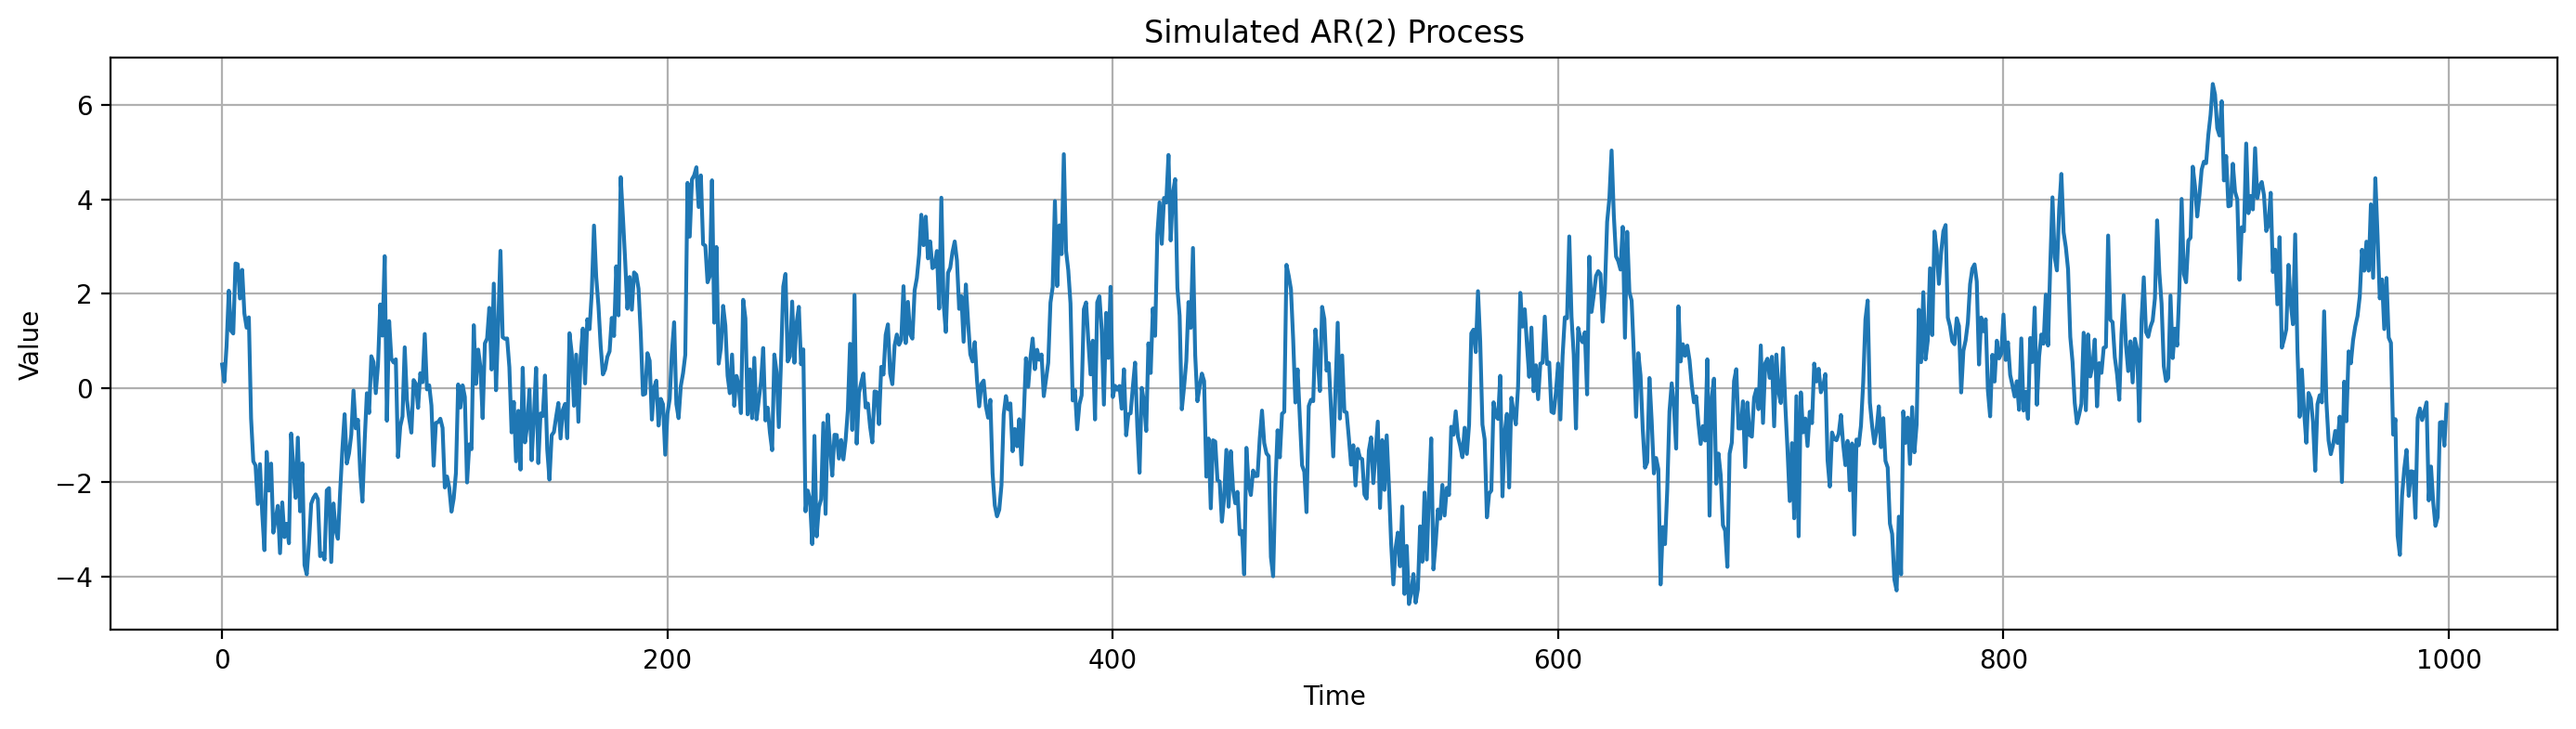

In [5]:
from statsmodels.tsa.arima_process import arma_generate_sample
import numpy as np
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Define AR parameters (with opposite signs for lag-polynomial representation)
arparams = np.array([0.55, 0.35])
maparams = np.array([0])

# Construct the AR and MA polynomials
ar = np.r_[1, -arparams]  # Add zero-lag and negate AR parameters
ma = np.r_[1, maparams]   # Add zero-lag for MA (not used in AR model)

# Generate the AR(2) process
y = arma_generate_sample(ar, ma, 1000)

# Plot the time series
plt.figure(figsize=(17, 4))
plt.plot(time, y)
plt.title('Simulated AR(2) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()


#### Plotting the Correlogram

Now, let's analyze the autocorrelation and partial autocorrelation functions (ACF and PACF) to better understand the properties of this AR(2) process.


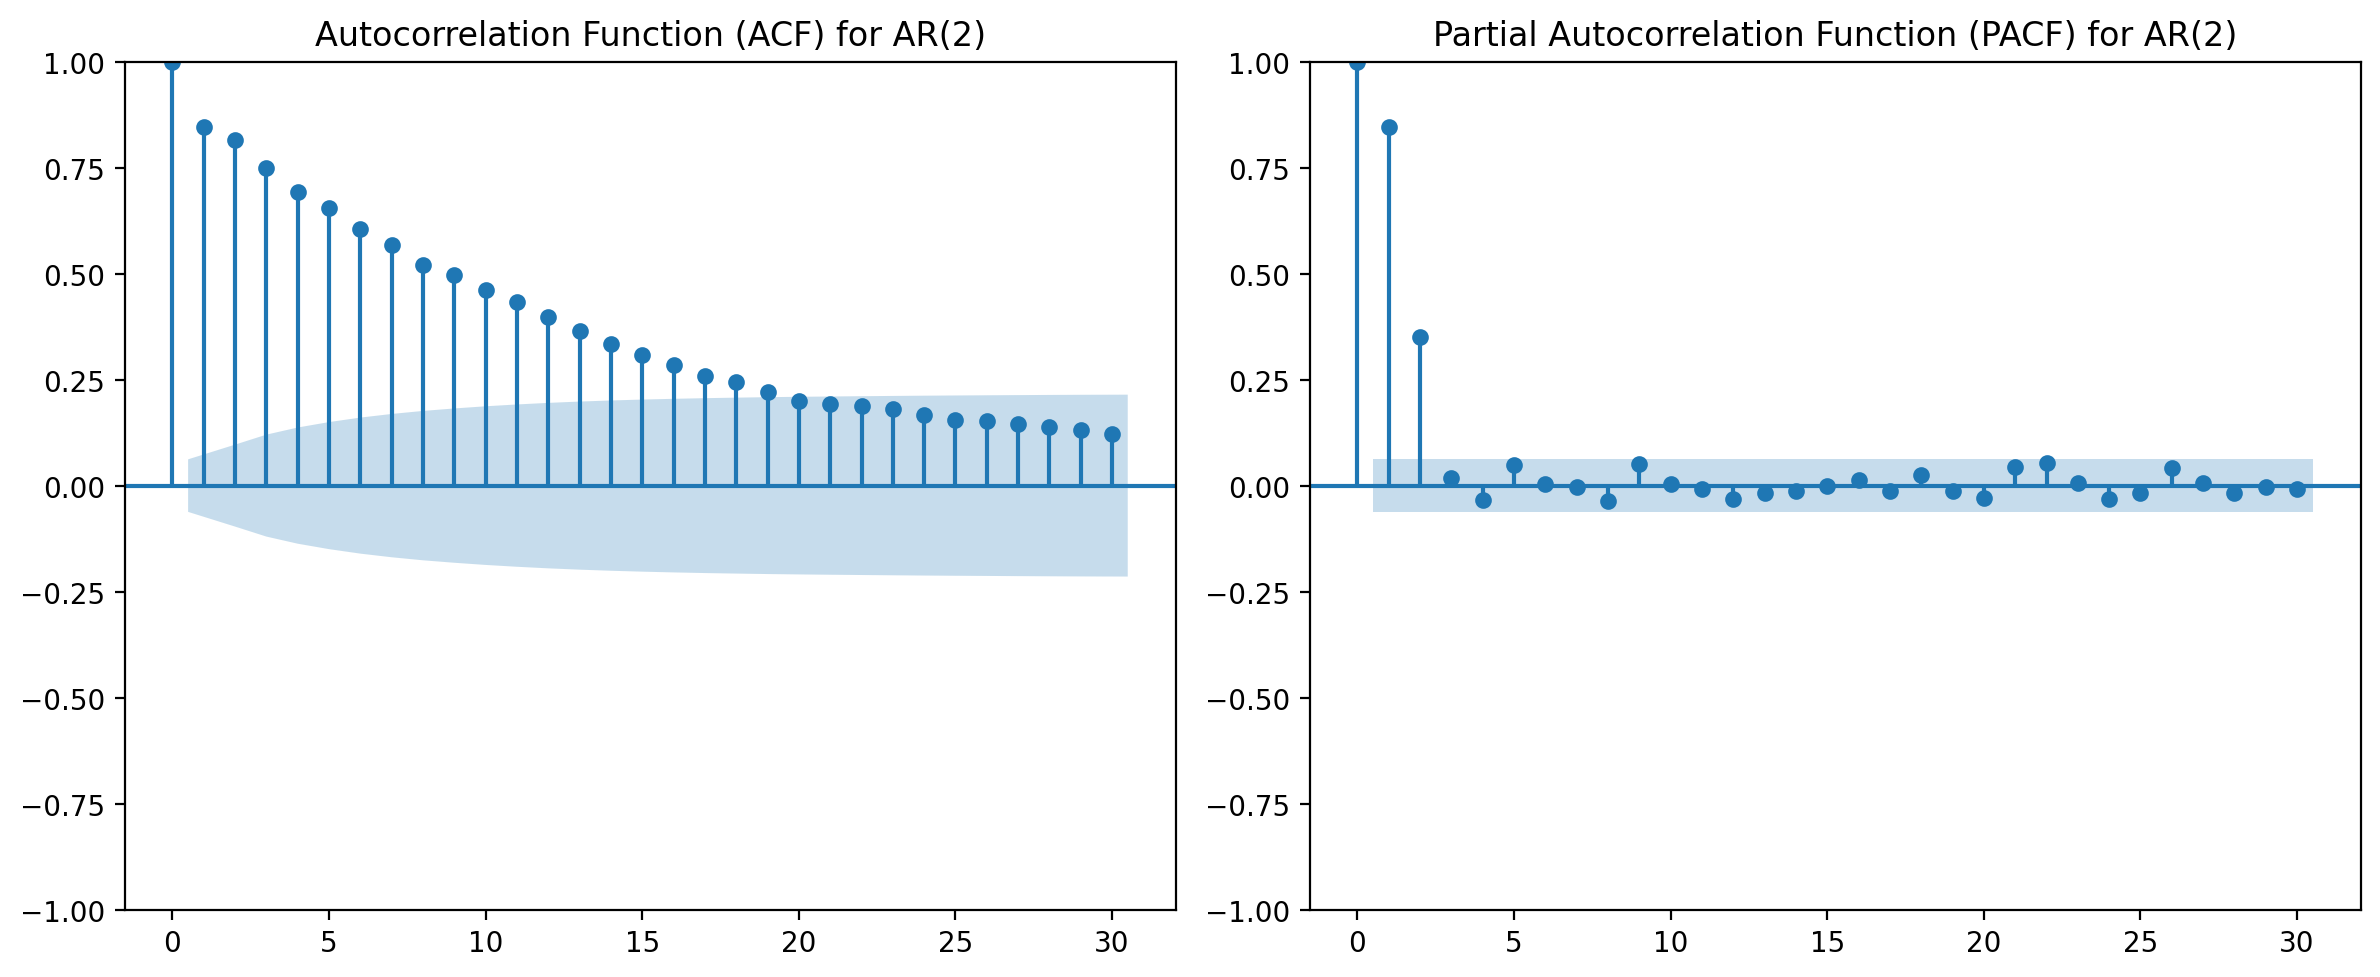

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots to display ACF and PACF horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the autocorrelation function (ACF) for AR(2)
acf_plot = plot_acf(y, lags=30, ax=axes[0], title='Autocorrelation Function (ACF) for AR(2)')

# Plot the partial autocorrelation function (PACF) for AR(2)
pacf_plot = plot_pacf(y, lags=30, ax=axes[1], title='Partial Autocorrelation Function (PACF) for AR(2)')

plt.tight_layout()
plt.show()


**Observation** - In the correlogram:

- The ACF (Autocorrelation Function) gradually decreases to zero, as expected for an AR model.
- The PACF (Partial Autocorrelation Function) cuts off after lag 2, confirming the AR(2) structure of the model.

Given that $\left|\beta_1 + \beta_2\right| < 1$, the model is **stationary**, satisfying the stationarity condition.

### 1.2. Estimation of AR(p)

Now, let's estimate the parameters of the AR(2) model. Several approaches can be used for this purpose, such as the Yule-Walker Estimation, the Maximum Likelihood Estimation (MLE), and others. In this lab, we will focus on the MLE approach, which is conveniently implemented in the `statsmodels` package.

To estimate the parameters of the AR(2) model using MLE, we can apply the following code:


In [7]:
!python --version


Python 3.13.5


In [6]:
import statsmodels.api as sm

# Fit the AR(2) model using Maximum Likelihood Estimation (MLE)
# Use ARIMA with order (p, d, q) where p=2 (AR), d=0 (no differencing), q=0 (no MA)
model = sm.tsa.ARIMA(y, order=(2, 0, 0), trend='n').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1398.319
Date:                Tue, 14 Oct 2025   AIC                           2802.639
Time:                        11:17:02   BIC                           2817.362
Sample:                             0   HQIC                          2808.235
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5488      0.030     18.388      0.000       0.490       0.607
ar.L2          0.3516      0.030     11.701      0.000       0.293       0.411
sigma2         0.9581      0.042     22.731      0.000       0.876       1.041
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.50
Prob(Q):                              0.84   Prob(JB):                         0.29
Heteroskedasticity (H):               1.02   Skew:                             0.12
Prob(H) (two-sided):                  0.86   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Observation** - The summary provides the parameter estimates for the AR(2) model. The small standard errors indicate that these estimates are precise, and the p-values are below the common significance level of 5%, suggesting that the estimates are statistically significant. You can extract the estimated parameters directly using the following function:

In [7]:
model.params[:-1]

array([0.54876032, 0.35164125])

## Section 2: Practical Approach to Simulating and Estimating MA(q)

### MA Model Overview
A **Moving Average (MA)** model is defined by the following equation:

$$
y_t = c + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \dots + \theta_q e_{t-q}
$$

where $e_t$ represents white noise. In this equation, $c$ is a constant, and the $\theta$'s are the model coefficients, similar to the ones found in linear regression.

#### MA Models vs. Moving Average Smoothing
It is important to distinguish between **moving average models** and **moving average smoothing**. 

- **Moving average smoothing** is a technique used to estimate the trend and seasonality of historical data by averaging over past observations.
- In contrast, **MA models** are used for forecasting by regressing the current value on past forecast errors. An MA model captures how past errors (random shocks) affect future values.

Although the terms can be confusing, these techniques serve entirely different purposes. A **moving-average model** is essentially a linear regression of the current value of the series on both current and past unobserved white noise error terms (or random shocks). These shocks are assumed to be independent and identically distributed (i.i.d.), typically following a normal distribution with a mean of zero and constant variance.

In this section, we will demonstrate how to generate MA models using Python.


### 2.1. Simulation of MA(q)

Let’s simulate an **MA(2)** model using the following equation:

$$
y_t = e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2}
$$

where $\theta_1 = 0.4$ and $\theta_2 = -0.4$, and $e_t$ represents white noise.


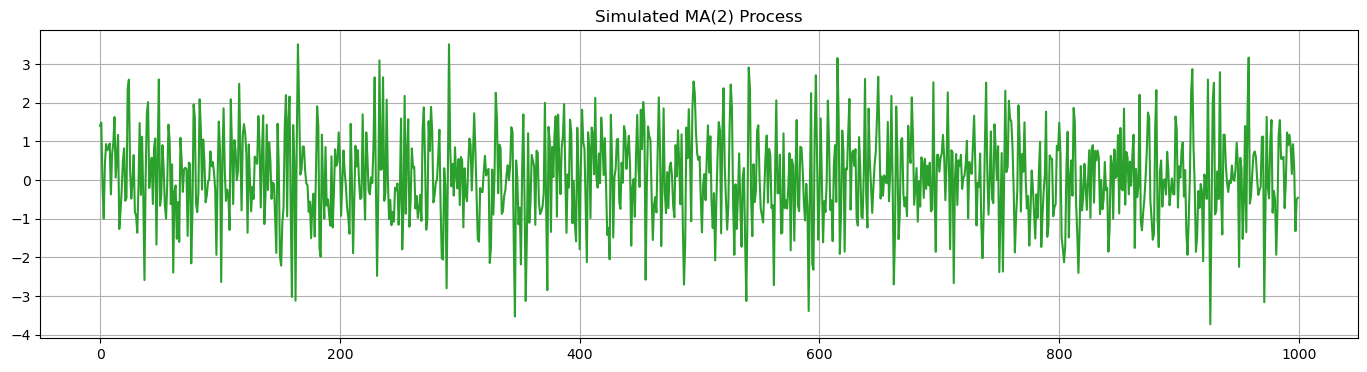

In [8]:
# Define parameters for MA(2)
arparams = np.array([0])  # No AR terms
maparams = np.array([0.4, -0.4])  # MA(2) terms: theta1=0.4, theta2=-0.4

# Add zero-lag and negate
ar = np.r_[1, -arparams]
ma = np.r_[1, maparams]

# Generate a sample of the MA(2) process
y = arma_generate_sample(ar, ma, 1000)

# Plot the simulated MA(2) process
plt.figure(figsize=(17, 4))
time = np.arange(1000)
plt.plot(time, y, color='tab:green')
plt.title('Simulated MA(2) Process')
plt.grid()
plt.show()


#### Plotting the Autocorrelation and Partial Autocorrelation

Let’s now visualize the autocorrelation (ACF) and partial autocorrelation (PACF) of the simulated MA(2) model:

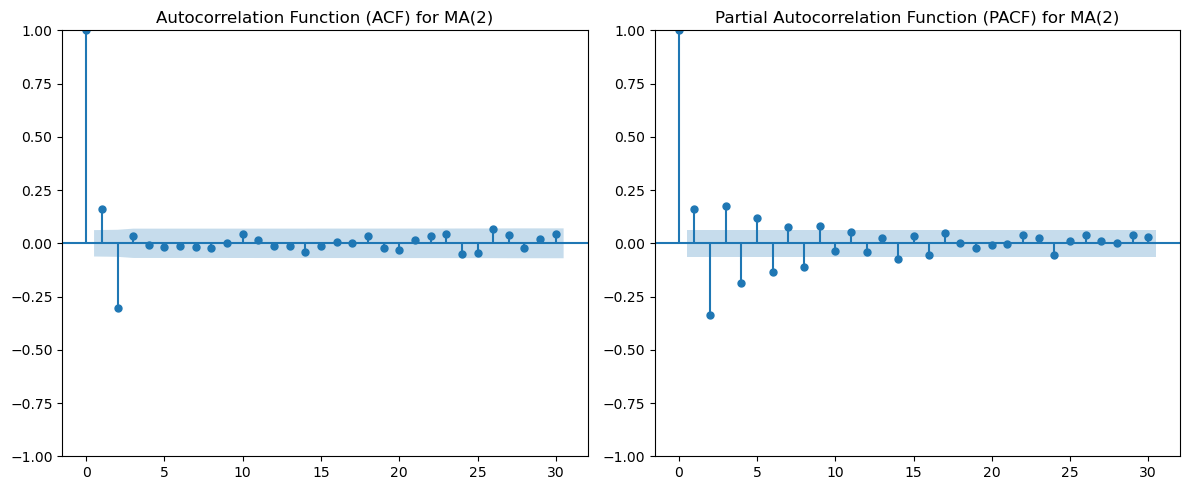

In [9]:
# Create subplots to display ACF and PACF horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the autocorrelation function (ACF) for MA(2)
acf_plot = plot_acf(y, lags=30, ax=axes[0], title='Autocorrelation Function (ACF) for MA(2)')

# Plot the partial autocorrelation function (PACF) for MA(2)
pacf_plot = plot_pacf(y, lags=30, ax=axes[1], title='Partial Autocorrelation Function (PACF) for MA(2)')

plt.tight_layout()
plt.show()

### Interpretation of ACF and PACF

For the **MA(2)** process, the ACF cuts off after lag 2, while the PACF gradually decreases to zero. This behavior aligns with the general characteristics of MA and AR processes. Here are some key properties:

#### AR vs. MA Processes:
- An **AR process** depends on its own previous values.
- An **MA process** depends on past errors (white noise terms).

#### ACF and PACF Behavior:
- **AR processes** show an exponential decay in the ACF and a cut-off in the PACF.
- **MA processes** show an exponential decay in the PACF and a cut-off in the ACF.

### Role of Random Shocks in MA vs. AR Models
The role of random shocks ($ \varepsilon_t $) in the **MA** model differs from their role in the **AR** model in two important ways:

1. **Direct Effect in MA Models**: In an MA model, shocks ($ \varepsilon_{t-1}, \varepsilon_{t-2}, \dots $) appear directly in the equation for the current value $ X_t $. This means that random shocks immediately impact the current value and up to $ q $ periods into the future.

2. **Indirect Effect in AR Models**: In an AR model, shocks indirectly affect future values. For instance, ($varepsilon_{t-1} $) influences  $ X_{t-1} $, and since $ X_{t-1} $ is part of the equation for $ X_t $, the effect of the shock carries over through the autoregressive structure.

Additionally, in **MA models**, a shock influences future values for a limited number of periods (up to $ q \) lags), while in **AR models**, a shock can have an infinite impact on future values, as each subsequent value is affected by the prior value.

For further reading on the moving average model, see the [Wikipedia entry on Moving Average Models](https://en.wikipedia.org/wiki/Moving-average_model).


### 2.2. Estimation of MA(q)

Now, let's proceed with estimating the parameters of the **MA(2)** model.


In [10]:
import statsmodels.api as sm

# Fit the AR(2) model using Maximum Likelihood Estimation (MLE)
# Use ARIMA with order (p, d, q) where p=0 (no AR), d=0 (no differencing), q=2 (MA)
model = sm.tsa.ARIMA(y, order=(0, 0, 2), trend='n').fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1417.860
Date:                Tue, 14 Oct 2025   AIC                           2841.719
Time:                        11:17:02   BIC                           2856.443
Sample:                             0   HQIC                          2847.315
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.4036      0.029     13.699      0.000       0.346       0.461
ma.L2         -0.4176      0.030    -14.004      0.000      -0.476      -0.359
sigma2         0.9968      0.044     22.594      0.000       0.910       1.083
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.61   Prob(JB):                         0.75
Heteroskedasticity (H):               0.91   Skew:                            -0.05
Prob(H) (two-sided):                  0.37   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
model.params[:-1]

array([ 0.40360232, -0.41760061])

## Section 3: A Practical Approach to Simulating and Estimating ARIMA(p,d,q)

The **ARMA** model combines both **autoregressive (AR)** and **moving average (MA)** components, allowing it to model time series that are influenced by their own past values as well as past errors. The **ARMA(p, q)** model integrates the AR(p) and MA(q) models and is widely used for modeling **univariate time series**.

The general equation for an **ARMA(p, q)** model is:

$$
y_t = c + \beta_1 y_{t-1} + \beta_2 y_{t-2} + \dots + \beta_p y_{t-p} + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \dots + \theta_q e_{t-q}
$$

Where:
- $y_t$ is the current value of the series,
- $c$ is the constant term,
- the $\beta$'s are the AR coefficients (for previous values of the series),
- $e_t$ is white noise (error term),
- the $\theta$'s are the MA coefficients (for previous errors).

### Stationarity and ARIMA

In time series analysis, a key assumption is that the series is **stationary** (i.e., its statistical properties like mean and variance do not change over time). However, in many practical cases, real-world time series data is **non-stationary**, which violates this assumption.

To address this, the **Autoregressive Integrated Moving Average (ARIMA)** model is introduced. The **ARIMA(p, d, q)** model extends the ARMA model by allowing the series to be **differenced** $d$ times to achieve stationarity. After differencing, the series can be treated as stationary, and the model reduces to an ARMA(p, q) form.

Thus, the ARIMA model incorporates three key elements:
- **p**: The number of autoregressive terms (AR).
- **d**: The number of times the data is differenced to make it stationary.
- **q**: The number of moving average terms (MA).

By applying differencing, the ARIMA model effectively transforms non-stationary data into a stationary series, making it suitable for ARMA modeling.


### 3.1. Simulation of ARMA(p, q)

Let's estimate an **ARMA(2, 2)** model using the following equation:

$$
y_t = \beta_1 y_{t-1} + \beta_2 y_{t-2} + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2}
$$

Where the coefficients are defined as:
- $\beta_1 = 0.55$
- $\beta_2 = 0.35$
- $\theta_1 = 0.4$
- $\theta_2 = -0.4$

We will use Python to simulate this ARMA(2, 2) process.

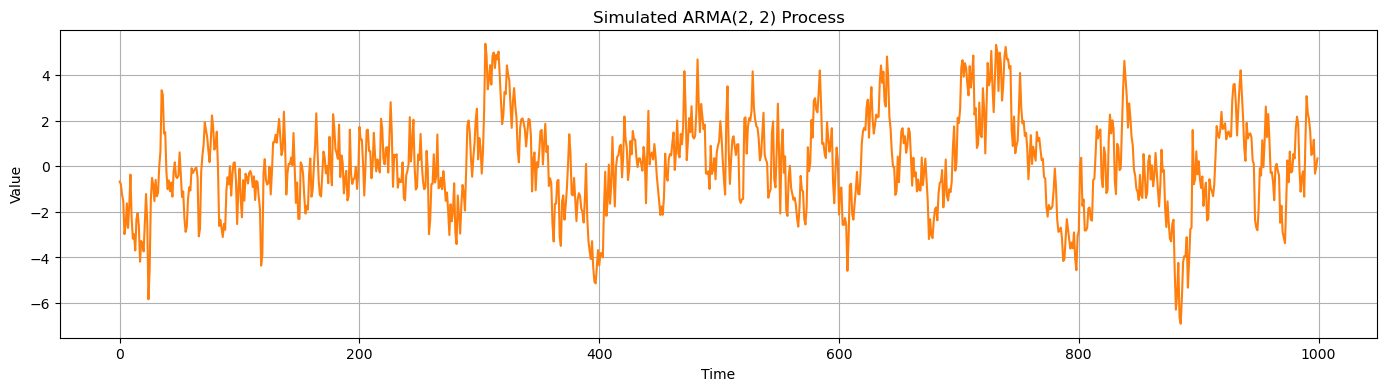

In [12]:
# Define AR and MA parameters
arparams = np.array([0.55, 0.35])  # AR(2) terms: beta1=0.55, beta2=0.35
maparams = np.array([0.4, -0.4])   # MA(2) terms: theta1=0.4, theta2=-0.4

# Add zero-lag and negate the AR terms
ar = np.r_[1, -arparams]  # np.r_ concatenates the 1 and negated AR parameters
ma = np.r_[1, maparams]   # Add zero-lag to MA parameters

# Generate a sample from the ARMA(2, 2) process
y = arma_generate_sample(ar, ma, 1000)

# Plot the simulated ARMA(2, 2) process
time = np.arange(1000)
plt.figure(figsize=(17, 4))
plt.plot(time, y, color='tab:orange')
plt.title('Simulated ARMA(2, 2) Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid()
plt.show()


Let’s plot the **Autocorrelation Function (ACF)** and **Partial Autocorrelation Function (PACF)** of our ARMA(2,2) model.

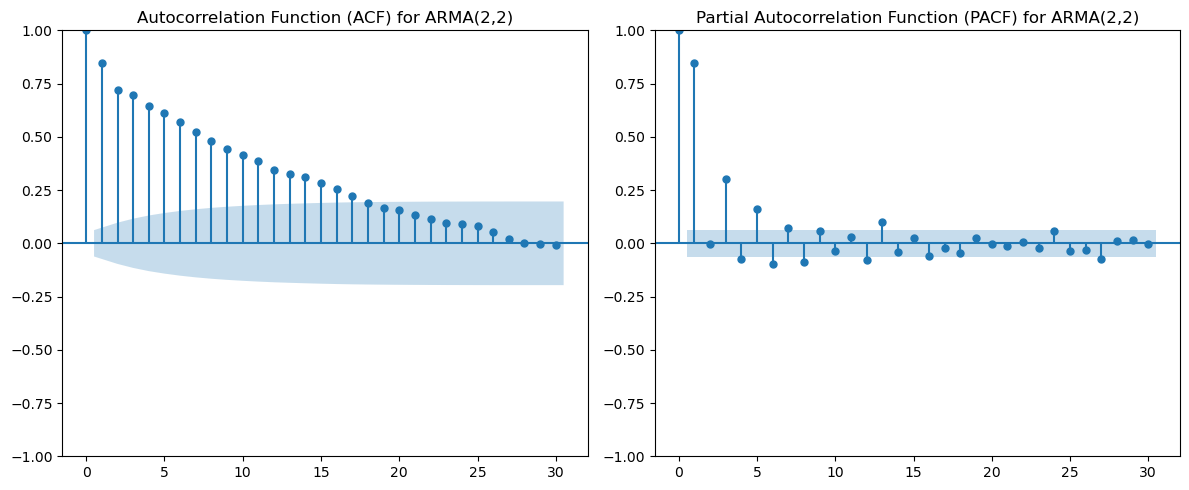

In [13]:
# Create subplots to display ACF and PACF horizontally
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the autocorrelation function (ACF) for ARMA(2,2)
acf_plot = plot_acf(y, lags=30, ax=axes[0], title='Autocorrelation Function (ACF) for ARMA(2,2)')

# Plot the partial autocorrelation function (PACF) for ARMA(2,2)
pacf_plot = plot_pacf(y, lags=30, ax=axes[1], title='Partial Autocorrelation Function (PACF) for ARMA(2,2)')

plt.tight_layout()
plt.show()

**Observation.** We observe that for the **ARMA(2,2)** model, the **ACF** gradually decays towards zero, and the **PACF** also exhibits a gradual decline. Neither the autocorrelation function (ACF) nor the partial autocorrelation function (PACF) show any abrupt cutoffs. This is characteristic of ARMA(p,q) models:

1. The true ACF and PACF both have infinitely many nonzero values.
2. Neither the ACF nor the PACF will completely cut off after a specific number of lags.
3. As a result, it is challenging to determine the correct orders of an ARMA(p,q) model using only the ACF and PACF.


### 3.2. Simulation of ARIMA(p,d,q)

### Simulation of ARIMA(p, d, q)

Building on the ARMA(2, 2) model for $y_t$, we can generate an **ARIMA(2,1,2)** model, denoted by $X_t$. Suppose the initial value of $X_t$ is $X_0 = 10$. The relationship between $y_t$ (the differenced series) and $X_t$ (the original series) is given by:

$$
y_t = \Delta X_t = X_t - X_{t-1}
$$

To compute the next value in the series, we can use:

$$
X_{t+1} = X_t + y_{t+1}
$$

With this, we can easily generate the **ARIMA(2,1,2)** model by first differencing the data to obtain $y_t$, then applying the ARMA(2, 2) model to $y_t$, and finally reconstructing the original series $X_t$ by summing the values of $y_t$.


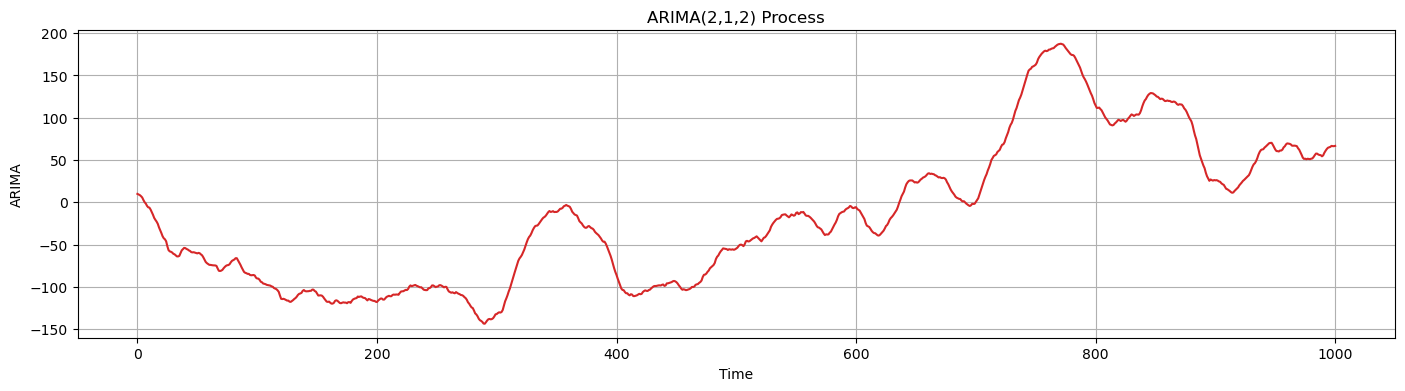

In [14]:
# Initial value of X
X0 = 10

# Create an array to store the ARIMA values, with one extra position for the initial value
X = np.zeros(len(y) + 1)
X[0] = X0  # Set the initial value

# Reconstruct the original series X_t from the differenced series y_t
for i in range(len(y)):
    X[i+1] = X[i] + y[i]

# The ARIMA series is now stored in the X array
ARIMA = X

# Plot the ARIMA(2,1,2) series
time1 = np.arange(len(ARIMA))
plt.figure(figsize=(17, 4))
plt.plot(time1, ARIMA, color='tab:red')
plt.title('ARIMA(2,1,2) Process')
plt.xlabel('Time')
plt.ylabel('ARIMA')
plt.grid()
plt.show()


Based on the plot, it appears that the generated time series is not stationary, as expected. To confirm this, let's formally test the stationarity using the **Augmented Dickey-Fuller (ADF)** test.

In [15]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the ARIMA series
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(ARIMA)

print('pvalue = ', pvalue)

# Check the result of the test
if pvalue > 0.05:
    print("The p-value is greater than 5%, indicating that the time series is not stationary.")
else:
    print("The p-value is less than or equal to 5%, indicating that the time series is stationary.")


pvalue =  0.3980863085630759
The p-value is greater than 5%, indicating that the time series is not stationary.


### 3.3. Estimation of ARMA(p, q)

Now, let's estimate the parameters of the **ARMA(2, 2)** model using the `ARIMA` function (with \( d = 0 \), since there's no differencing in an ARMA model):


In [16]:
import statsmodels.api as sm

# Estimate the parameters of the ARMA(2, 2) model
model = sm.tsa.ARIMA(y, order=(2, 0, 2), trend='n').fit()

# Display the summary of the model
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1401.927
Date:                Tue, 14 Oct 2025   AIC                           2813.855
Time:                        11:17:02   BIC                           2838.394
Sample:                             0   HQIC                          2823.181
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5738      0.061      9.400      0.000       0.454       0.693
ar.L2          0.3353      0.052      6.422      0.000       0.233       0.438
ma.L1          0.3613      0.059      6.142      0.000       0.246       0.477
ma.L2         -0.4345      0.039    -11.178      0.000      -0.511      -0.358
sigma2         0.9646      0.042     23.047      0.000       0.883       1.047
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.94   Prob(JB):                         0.39
Heteroskedasticity (H):               1.05   Skew:                             0.06
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
model.params[:-1]

array([ 0.57377862,  0.33534996,  0.36134388, -0.43449539])

## Section 4: Practical Exercise

In this exercise, you will work with two datasets: **auto_1.csv** and **auto_2.csv**. Your objective is to apply the techniques learned throughout this course to analyze and model these time series datasets. Specifically, you will:

1. **Load the datasets**: Import `auto_1.csv` and `auto_2.csv` into your environment.
2. **Create a time variable**: Generate a time variable called `mytime` that starts at 0 and has the same length as both datasets.
3. **Visualize the time series**: Plot the time series data from `auto_1` and `auto_2` to observe trends and patterns.
4. **Identify ARMA/ARIMA orders**: Use methods such as ACF, PACF to determine the optimal values of `p` (autoregressive order) and `q` (moving average order).
5. **Fit the model**: Based on the chosen values of `p` and `q`, fit the appropriate model. Experiment with other model configurations to optimize the fit and performance.

This exercise will help you reinforce key concepts in time series modeling and explore different approaches to improve the model’s performance.
